# Iris Species Clustering - KMeans - PCA - tSNE python implementation

<b>Even though we know that the Iris Species dataset is a typical supervised learning dataset where the class is known, I have used the same dataset for clustering purposes to demonstrate the power of KMeans Clustering and demonstrate how PCA or tSNE can be used for compression of variables within a dataset</b>

Lorik Berisha - May 2021

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [84]:
df = pd.read_csv('Iris.csv')

In [85]:
original_dataset = pd.read_csv('Iris.csv')

In [86]:
df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


# Preprocessing

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [89]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [90]:
df.Species.replace(["Iris-setosa","Iris-versicolor","Iris-virginica"],[0,1,2], inplace = True)

In [91]:
df['Species'] = pd.to_numeric(df['Species'])

In [92]:
x = df.iloc[:,[1,2,3,4]]

In [93]:
x.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


# EDA

In [94]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [95]:
plt.style.use(['classic'])

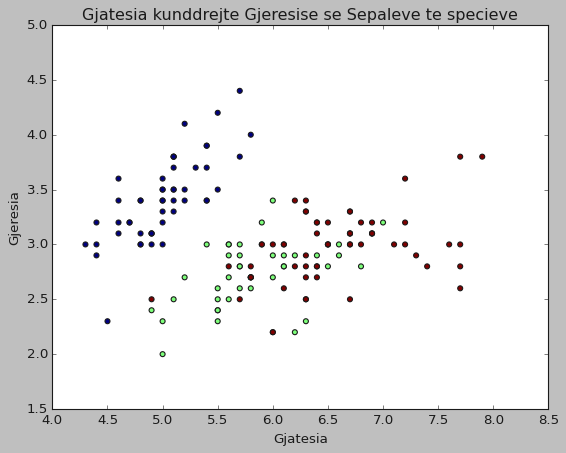

In [96]:
plt.title('Gjatesia kunddrejte Gjeresise se Sepaleve te specieve')
plt.xlabel('Gjatesia')
plt.ylabel('Gjeresia')
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = df.Species)

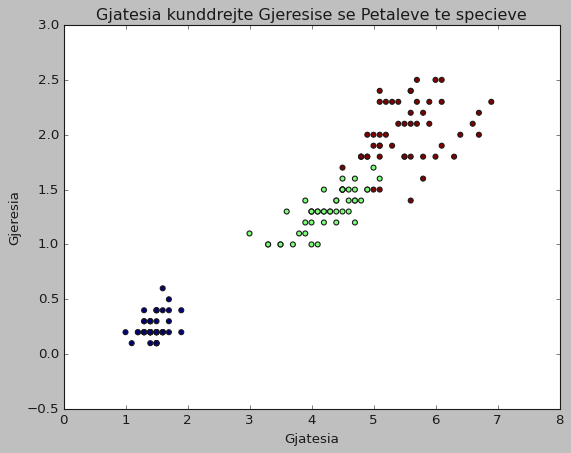

In [97]:
plt.title('Gjatesia kunddrejte Gjeresise se Petaleve te specieve')
plt.xlabel('Gjatesia')
plt.ylabel('Gjeresia')
plt.scatter(x.iloc[:,2],x.iloc[:,3], c = df.Species)

# t SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [98]:
from sklearn.manifold import TSNE

In [99]:
x_tsne = TSNE(learning_rate=20).fit_transform(x)

In [100]:
x_tsne.shape

(150, 2)

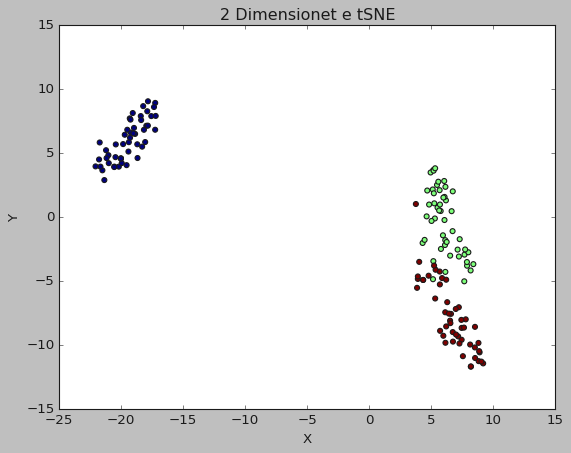

In [101]:
plt.title('2 Dimensionet e tSNE')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_tsne[:,0], x_tsne[:,1], c = df.Species)

# PCA

Principal Component Analysis is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components.

https://www.javatpoint.com/dimensionality-reduction-technique

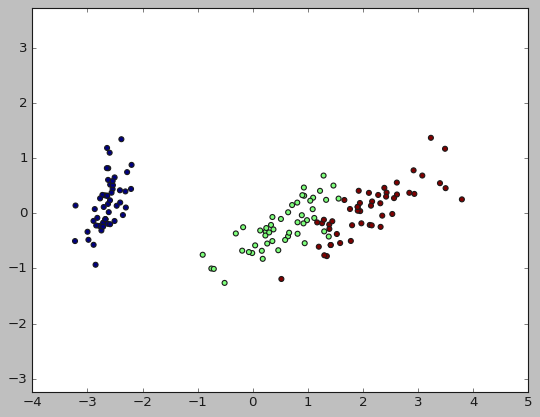

In [102]:
from sklearn.decomposition import PCA

model = PCA()

pca_features = model.fit_transform(x)

xs = pca_features[:,0]

ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, c = df.Species)
plt.axis('equal')
plt.show()

<h3>Intrinsic Dimension - Skree Plot</h3>

Based on the plot below, PCA1 and PC2 cover the most variance for the dataset therefore 2 Principle Components a.k.a "Variables" can be used to form a 2D simulated dataset. In that way clusters of data can be detected and visualised easily!

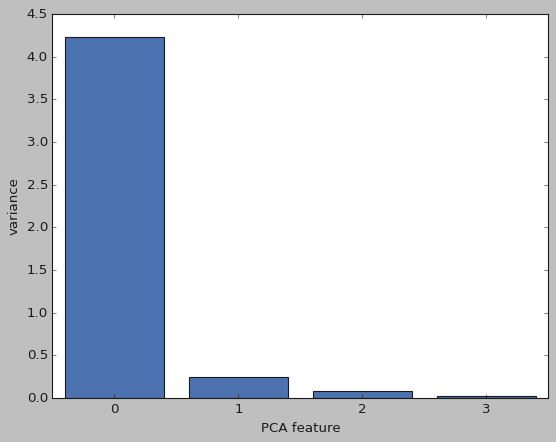

In [103]:
pca = PCA()

pca.fit(x)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# Inertia - Elbow Method

The elbow plot which observes a significat node change in variance, is used to determine the optimal number of clusters for some data. In our case we can see that an elbow is formed at 3, hence 3 clusters are optimal for the representation of our dataset

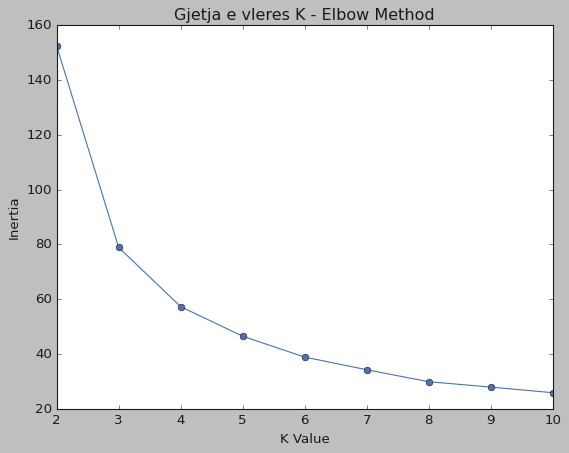

In [104]:
k = np.arange(2,11)

inertia = []
score = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(np.array(x))
    inertia.append(kmeans.inertia_)

plt.plot(k,inertia,"o-")
plt.xticks(k)
plt.xlabel("K Value")
plt.ylabel("Inertia")
plt.title("Gjetja e vleres K - Elbow Method")
plt.show()

# K Means 3 Clusters

In [105]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(np.array(x))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
labels=kmeans.labels_
clusters=pd.concat([original_dataset, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


CrossTab can be used in our case because we have predicted some optimal clusters, and on the other hand the Iris dataset being a not so ideal dataset for clustering because we know the class, has 3 Categories as species. In this case we can measure our "error" knowing the fact that we have 3 clusters and 3 classes.

We can see that we have a missmatch between cluster 1 and 2 determining the exact class of Iris-virginica with 14 "wrongly" assigned points in cluster 1.

In [107]:
pd.crosstab(clusters.Species, clusters.cluster).T.style.background_gradient(cmap='summer_r')

Species,Iris-setosa,Iris-versicolor,Iris-virginica
cluster,,,
0,50,0,0
1,0,48,14
2,0,2,36


C:\Users\RBKO\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

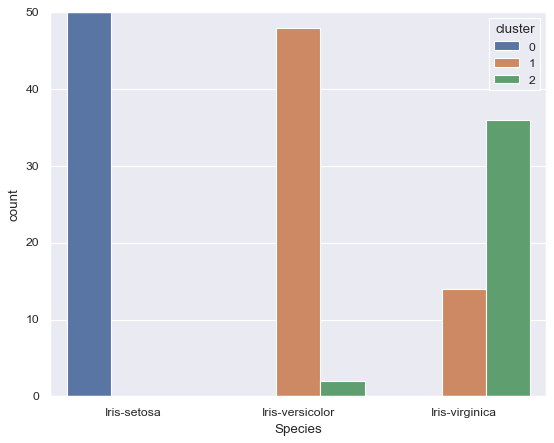

In [108]:
sns.set(style="darkgrid")
sns.countplot('Species', data = clusters, hue = 'cluster')

When KMeans is used with scikit learn, it has cluster_centers_ attribute automatically generated after fitting the data. What cluster_centers_ provide is information of the position of each Centroid!

In [109]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

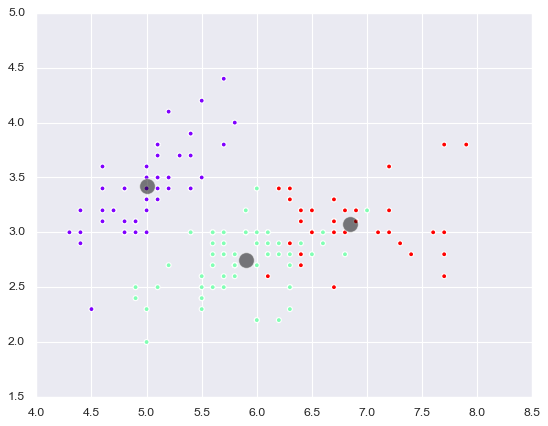

In [110]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

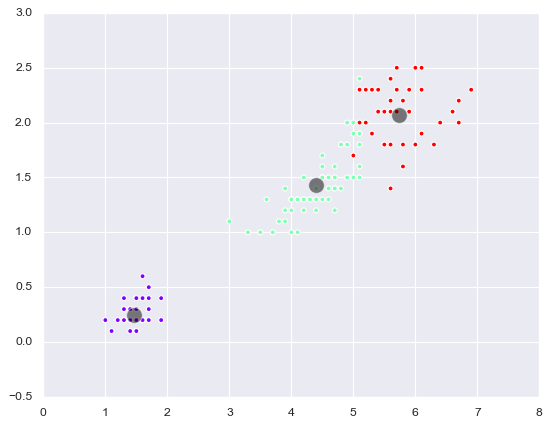

In [111]:
plt.scatter(x.iloc[:,2],x.iloc[:,3], c=kmeans.labels_, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5);
plt.show()

# Performance with Standard Scaler

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [114]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(np.array(x))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
labels_2=kmeans.labels_
second_df=pd.concat([clusters, pd.DataFrame({'cluster_scaled':labels_2})], axis=1)
second_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,cluster_scaled
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1


In [117]:
pd.crosstab(second_df.Species, second_df.cluster_scaled).T.style.background_gradient(cmap='summer_r')

Species,Iris-setosa,Iris-versicolor,Iris-virginica
cluster_scaled,,,
0,0,48,14
1,50,0,0
2,0,2,36
